## INDEX = 190691B
## NAME = WIDANAGAMAGE T.R

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Q1

Text(0.5, 1.0, 'intencity_transformed_image')

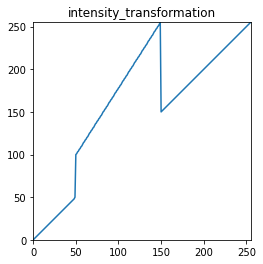

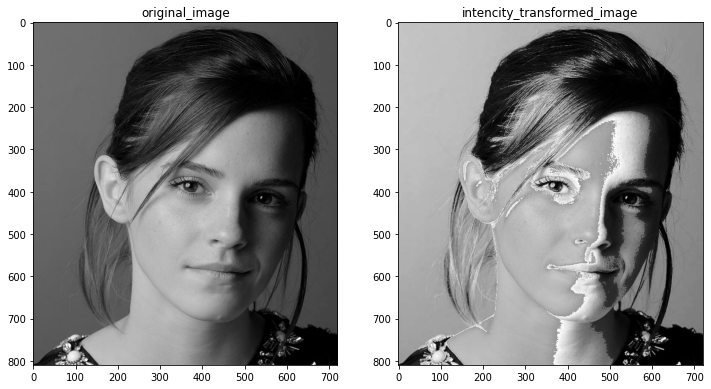

In [2]:
f = cv.imread(r'emma_gray.jpg', cv.IMREAD_GRAYSCALE)

assert f is not None

t1 = np.linspace(0, 50, 50)
t2 = np.linspace(50, 100, 0)
t3 = np.linspace(100, 255, 100)
t4 = np.linspace(255, 150, 0)
t5 = np.linspace(150, 255, 106)

t = np.concatenate((t1, t2, t3, t4, t5), axis = 0).astype(np.uint8)

fg, ax = plt.subplots()
ax.plot(t)

ax.set_title('intensity_transformation')
ax.set_aspect('equal')
plt.xlim([0, 255])
plt.ylim([0, 255])

assert len(t) == 256
g = cv.LUT(f, t)

f = cv.cvtColor(f, cv.COLOR_BGR2RGB)
g = cv.cvtColor(g, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(12, 12))

# ax[0].imshow(f, cmap = 'gray', vmin=0, vmax=255)
# ax[1].imshow(g, cmap = 'gray', vmin=0, vmax=255)

ax[0].imshow(f)
ax[0].set_title('original_image')
ax[1].imshow(g)
ax[1].set_title('intencity_transformed_image')


# Q2

Text(0.5, 1.0, 'white matter')

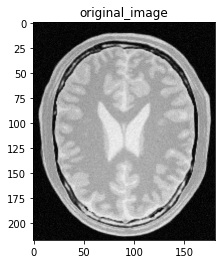

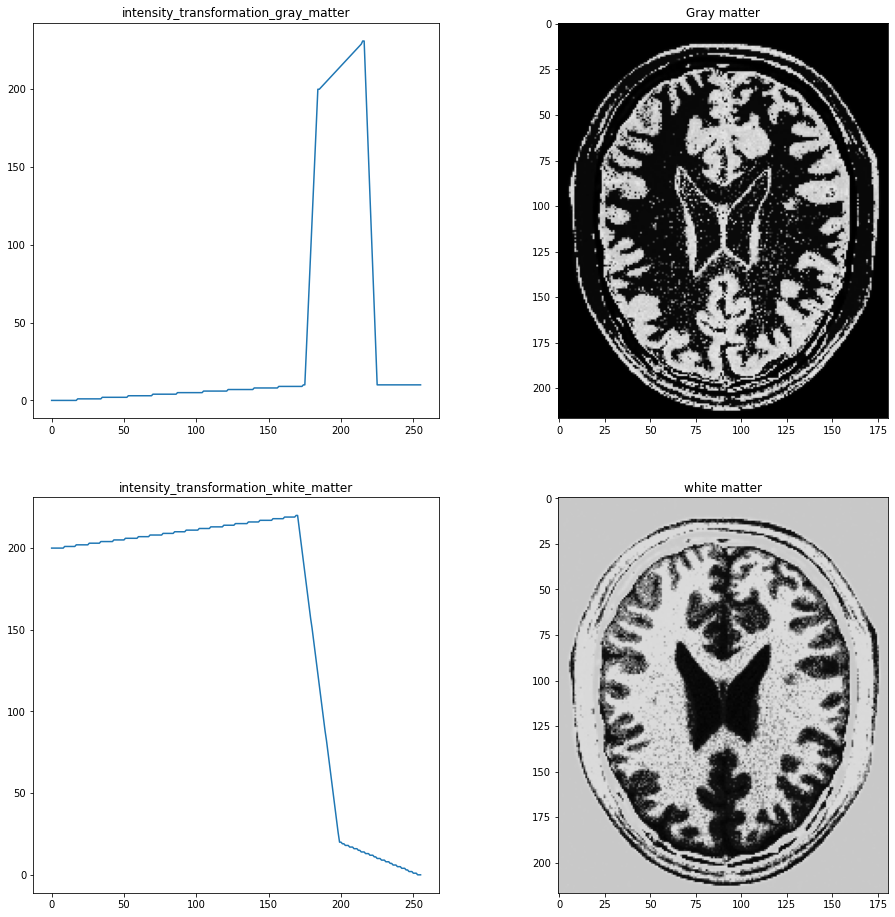

In [6]:
f = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
f = cv.cvtColor(f, cv.COLOR_BGR2RGB)

assert f is not None

t1 = np.linspace(0, 10, 175)
t2 = np.linspace(10, 200, 10)
t3 = np.linspace(200, 231, 31)
t8 = np.linspace(231, 10, 10)
t9 = np.linspace(10, 10, 30)

t4 = np.linspace(0, 200, 0)
t5 = np.linspace(200, 220, 170)
t6 = np.linspace(220, 20, 30)
t7 = np.linspace(20, 0, 56)

# t4 = np.linspace(0, 50, 80)
# t5 = np.linspace(50, 100, 100)
# t6 = np.linspace(200, 255, 76)


t = np.concatenate((t1, t2, t3, t8, t9), axis = 0).astype(np.uint8)
t_ = np.concatenate((t4, t5, t6, t7), axis = 0).astype(np.uint8)

fg, ax = plt.subplots()

ax.imshow(f)
ax.set_title('original_image')


# ax.set_title('intensity_transformation')                          #RGB colors for gray matter nearly 200, 127, 137
# ax.set_aspect('equal')
# plt.xlim([0, 255])
# plt.ylim([0, 255])

assert len(t) == 256
g = cv.LUT(f, t)
h = cv.LUT(f, t_)


g = cv.cvtColor(g, cv.COLOR_BGR2RGB)
h = cv.cvtColor(h, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(2, 2, figsize=(16, 16))

# ax[0].imshow(f, cmap = 'gray', vmin=0, vmax=255)
# ax[1].imshow(g, cmap = 'gray', vmin=0, vmax=255)

ax[0][0].plot(t)
ax[0][0].set_title('intensity_transformation_gray_matter')

ax[0][1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[0][1].set_title('Gray matter')

ax[1][0].plot(t_)
ax[1][0].set_title('intensity_transformation_white_matter')

ax[1][1].imshow(h, cmap='gray', vmin=0, vmax=255)
ax[1][1].set_title('white matter')




# Q3

Text(0.5, 1.0, 'gamma corected image on L palne')

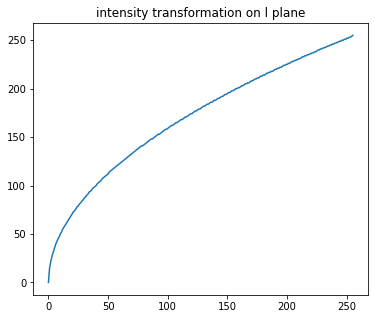

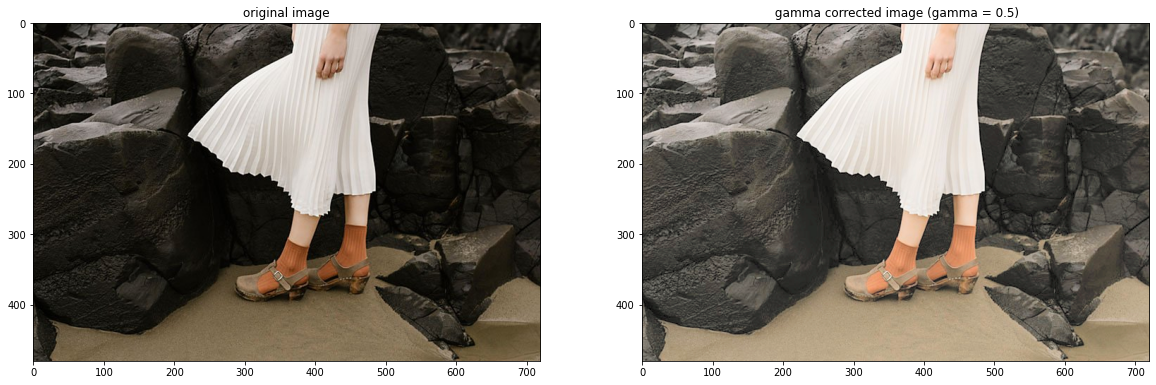

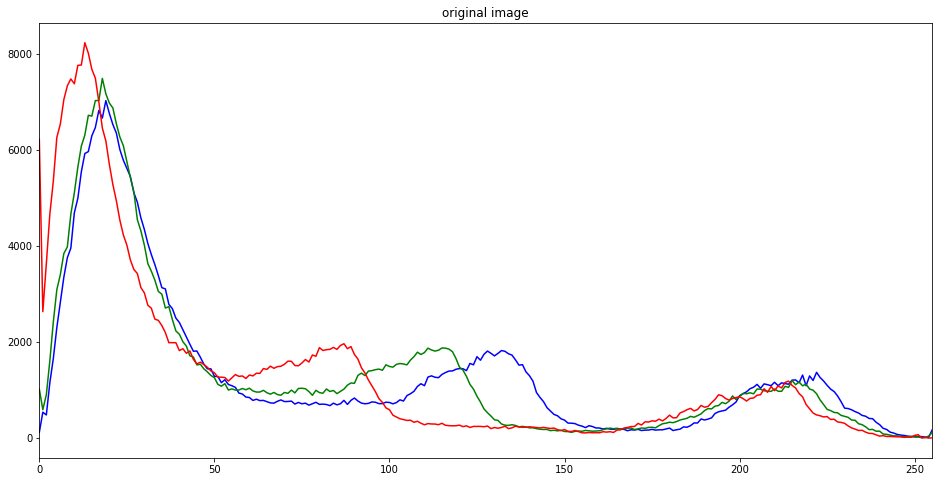

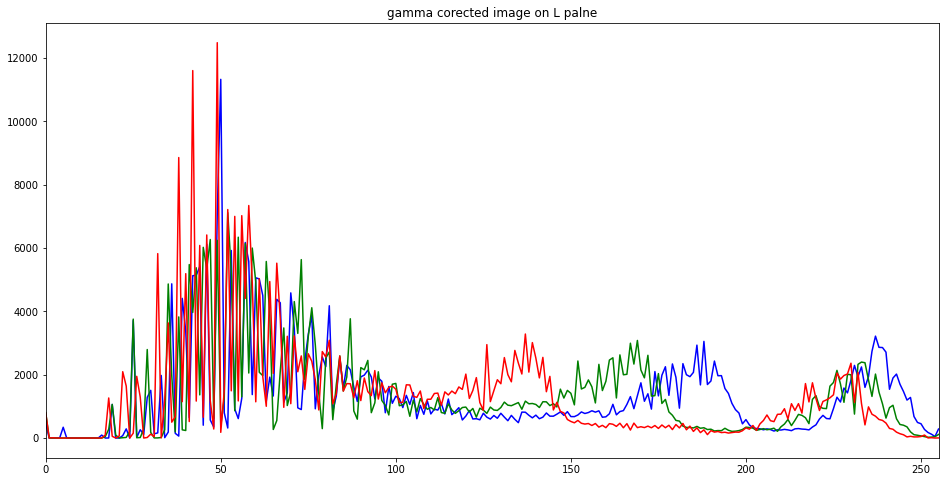

In [17]:
f = cv.imread(r'highlights_and_shadows.jpg')
assert f is not None

f1 = cv.cvtColor(f, cv.COLOR_BGR2RGB)
f2 = cv.cvtColor(f, cv.COLOR_BGR2LAB)

gamma = 0.5
t = np.array([(p/255)**gamma*255 for p in range(0, 256)]).astype(np.uint8)
fig, ax = plt.subplots(figsize=(6, 5))
ax.plot(t)
ax.set_title("intensity transformation on l plane")

f3 = cv.LUT(f2[:, :, 0], t)
f2[:,:, 0] = f3    
f4 = cv.cvtColor(f2, cv.COLOR_LAB2RGB)  

hist_f = cv.calcHist([f1], [2], None, [256], [0, 256]) #histogram of original image
hist_f4 = cv.calcHist([f4], [2], None, [256], [0, 256]) #histogram of gamma corected image

fig, ax = plt.subplots(1, 2, figsize=(20, 20))

ax[0].imshow(f1)
ax[0].set_title("original image")
ax[1].imshow(f4)
ax[1].set_title(" gamma corrected image (gamma = " + str(gamma) + ")")

fig, axes= plt.subplots(figsize=(16,8))
channels = ['b', 'g', 'r'] # since opencv reads img as BGR channel order
for i, channel in enumerate(channels):
    histogram = cv.calcHist([f1], [i], None, [256], [0,256])
    plt.plot(histogram, color = channel)
    plt.xlim([0, 255])
axes.set_title("original image")

fig, axes= plt.subplots(figsize=(16,8))
channels = ['b', 'g', 'r'] # since opencv reads img as BGR channel order
for i, channel in enumerate(channels):
    histogram = cv.calcHist([f4], [i], None, [256], [0,256])
    plt.plot(histogram, color = channel)
    plt.xlim([0, 255])
axes.set_title("gamma corected image on L palne")

# Q4

Text(0.5, 1.0, 'equlized image from opencv function')

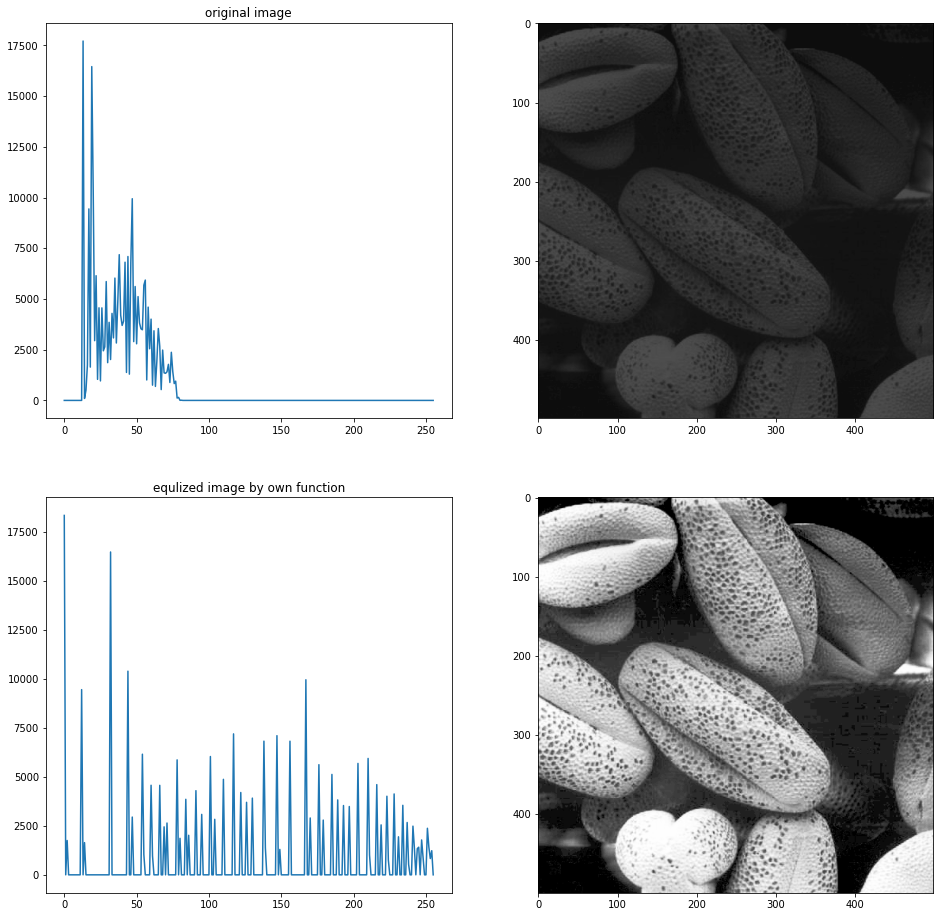

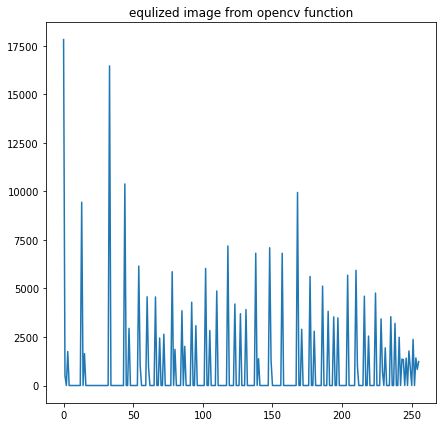

In [33]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread(r"shells.png", cv.IMREAD_GRAYSCALE)
assert img is not None

def my_hist(img):
    hist = np.histogram(img.flatten(),256,[0,256])[0]
    cdf = hist.cumsum()
    cdf = np.ma.masked_equal(cdf,0) #remove the masked value
    cdf = (cdf - cdf.min())*255/(cdf.max()-cdf.min())
    cdf = np.ma.filled(cdf,0).astype('uint8') #masked value filled
    img_eq = cv.LUT(img, cdf)
    return img_eq

manual_eq = my_hist(img)

hist_img = cv.calcHist([img], [0], None, [256], [0, 256])
hist_man_img = cv.calcHist([manual_eq], [0], None, [256], [0, 256])

# hist = np.histogram(img)

fg, ax = plt.subplots(2,2, figsize=(16, 16))
ax[0][0].plot(hist_img)
ax[0][0].set_title("original image")
ax[0][1].imshow(img, cmap='gray', vmin = 0, vmax = 255)
ax[1][0].plot(hist_man_img)
ax[1][0].set_title("equlized image by own function")
ax[1][1].imshow(manual_eq, cmap='gray', vmin = 0, vmax = 255)

fg, ax = plt.subplots( figsize=(7, 7))
ax.plot(cv.calcHist([cv.equalizeHist(img)], [0], None, [256], [0, 256]))
ax.set_title("equlized image from opencv function")
    


# Q5

(75, 120, 3)
(300, 480, 3)


C:\Users\traja\AppData\Local\Temp\ipykernel_12992\532967017.py:32: RuntimeWarning: overflow encountered in ubyte_scalars
  ssd+= (im_zoom_given[row][col][p]-zoomed[row][col][p])**2
C:\Users\traja\AppData\Local\Temp\ipykernel_12992\532967017.py:32: RuntimeWarning: overflow encountered in int_scalars
  ssd+= (im_zoom_given[row][col][p]-zoomed[row][col][p])**2


-565054215


Text(0.5, 1.0, 'zoomed_given')

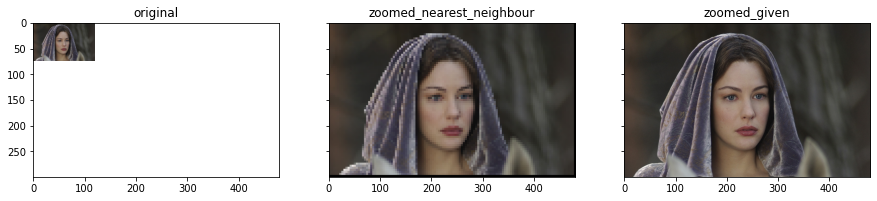

In [47]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math as m

im = cv.imread(r"a1q5images/im02small.png", cv.IMREAD_REDUCED_COLOR_4)
im_zoom_given = cv.imread(r"a1q5images/im02.png", cv.IMREAD_REDUCED_COLOR_4)

assert im is not None
print(im.shape)

s = 4
ssd = 0
zoomed = np.zeros((m.ceil(im.shape[0]*s), m.ceil(im.shape[1]*s), 3), dtype=im.dtype)
print(zoomed.shape)

if (s>=1):
    for row in range(zoomed.shape[0]-m.ceil(s)):
        for col in range(zoomed.shape[1]-m.ceil(s)):
            for p in range(3):
                zoomed[row][col][p] = im[m.floor(row/s)][m.floor(col/s)][p]
else:
    for row in range(zoomed.shape[0]-1):
        for col in range(zoomed.shape[1]-1):
            for p in range(3):
                zoomed[row][col][p] = im[m.floor(row/s)][m.floor(col/s)][p]


for row in range(zoomed.shape[0]):
    for col in range(zoomed.shape[1]):
        for p in range(3):
            ssd+= (im_zoom_given[row][col][p]-zoomed[row][col][p])**2
            # print(im_zoom_given[row][col][p]-zoomed[row][col][p])
            
print(ssd)

fig, ax = plt.subplots(1, 3 , figsize=(15, 15), sharex = 'all', sharey = 'all')

ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title("original")
ax[1].imshow(cv.cvtColor(zoomed, cv.COLOR_BGR2RGB))
ax[1].set_title("zoomed_nearest_neighbour")
ax[2].imshow(cv.cvtColor(im_zoom_given, cv.COLOR_BGR2RGB))
ax[2].set_title("zoomed_given")
# ax[1].imshow(zoomed, cmap='gray')


(75, 120, 3)
(150, 240, 3)


Text(0.5, 1.0, 'zoomed_bilinear_interpolation')

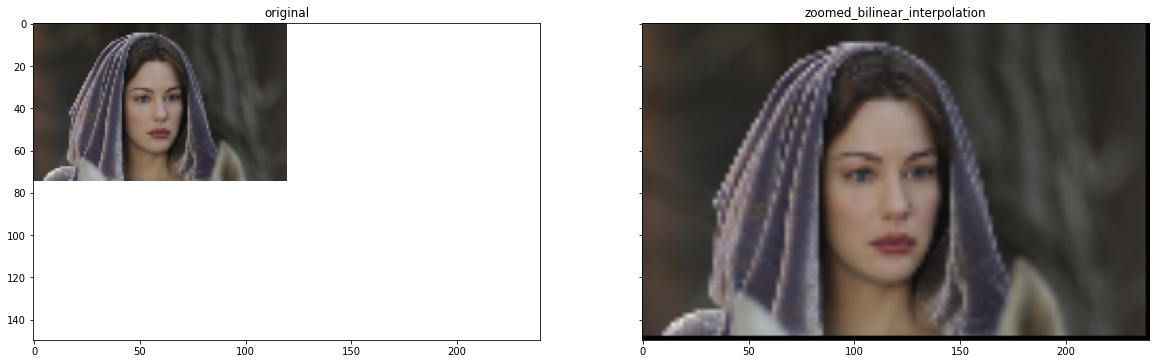

In [48]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math as m

im = cv.imread(r"a1q5images/im02small.png", cv.IMREAD_REDUCED_COLOR_4)

assert im is not None
print(im.shape)

s = 2
ssd = 0
zoomed = np.zeros((m.ceil(im.shape[0]*s), m.ceil(im.shape[1]*s), 3), dtype=im.dtype)
print(zoomed.shape)

if (s>=0):
    for row in range(zoomed.shape[0]-m.ceil(s)):
        for col in range(zoomed.shape[1]-m.ceil(s)):
            for p in range(3):
                tb = row/s - m.floor(row/s)
                rl = col/s - m.floor(col/s)

                tl = im[m.floor(row/s)][m.floor(col/s)][p]
                tr = im[m.floor(row/s)][m.ceil(col/s)][p]
                bl = im[m.ceil(row/s)][m.floor(col/s)][p]
                br = im[m.ceil(row/s)][m.ceil(col/s)][p]

                pix = (tl*tb+bl*(1-tb))*rl  +   (tr*tb+br*(1-tb))*(1-rl)
                zoomed[row][col][p] = pix

fig, ax = plt.subplots(1, 2 , figsize=(20, 20), sharex = 'all', sharey = 'all')

ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title("original")
ax[1].imshow(cv.cvtColor(zoomed, cv.COLOR_BGR2RGB))
ax[1].set_title("zoomed_bilinear_interpolation")

# Q6

Text(0.5, 1.0, 'Magnitude')

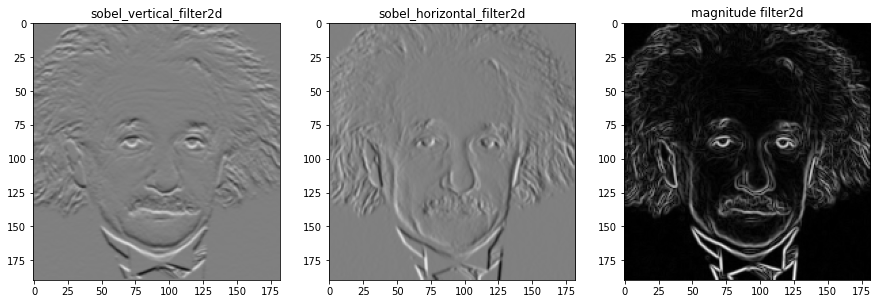

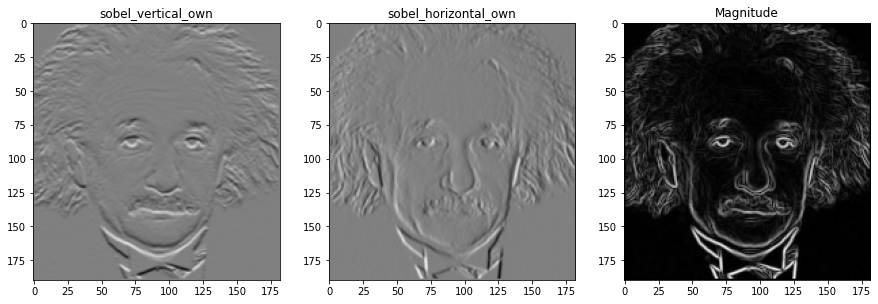

In [51]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread(r"einstein.png", cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.float32)
# im = cv.cvtColor(im, cv.COLOR_GRAY2BGR)
# im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
assert im is not None

def sobel(im, kernal):
    row, col = im.shape
    filtered_im = np.zeros((im.shape))
    for i in range(0 + 1, row-1):
        for j in range(0 + 1, col-1):
            av = 0
            for ki in [0, 1, 2]:
                for kj in [0, 1, 2]:
                    av+= im[i - 1 + ki][j - 1 + kj]*kernal[ki][kj]
            filtered_im[i][j] = av
    return filtered_im

sobel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
sobel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)

sobelv_im = cv.filter2D(im, -1, sobel_v)
sobelh_im = cv.filter2D(im, -1, sobel_h)

mag = (sobelv_im**2+sobelh_im**2)**0.5


fig, ax = plt.subplots(1, 3, figsize=(15, 15))

ax[0].imshow(sobelv_im, cmap='gray', vmin=-1020, vmax=1020)
ax[0].set_title("sobel_vertical_filter2d")
ax[1].imshow(sobelh_im, cmap='gray', vmin=-1020, vmax=1020)
ax[1].set_title("sobel_horizontal_filter2d")
ax[2].imshow(mag, cmap = 'gray')
ax[2].set_title("magnitude filter2d")
# ax[1].set_title("sobel_horizontal_filter2d")
# im = np.array([[1, 2, 3, 4], [1, 8, 3, 4], [1, 2, 3, 4]])

filtered_imv = sobel(im, sobel_v)
filtered_imh = sobel(im, sobel_h)

mag = (filtered_imv**2+filtered_imh**2)**0.5
# filtered_imv = cv.cvtColor(filtered_imv, cv.COLOR_GRAY2RGB)
# filtered_imh = cv.cvtColor(filtered_imh, cv.COLOR_GRAY2RGB)

fig, ax = plt.subplots(1, 3, figsize=(15, 15))

ax[0].imshow(filtered_imv, cmap='gray', vmin=-1020, vmax=1020)
ax[0].set_title("sobel_vertical_manual")
ax[1].imshow(filtered_imh, cmap='gray', vmin=-1020, vmax=1020)
ax[1].set_title("sobel_horizontal_manual")
ax[2].imshow(mag, cmap = 'gray')
ax[2].set_title("Magnitude_manual")

Text(0.5, 1.0, 'sobel_h')

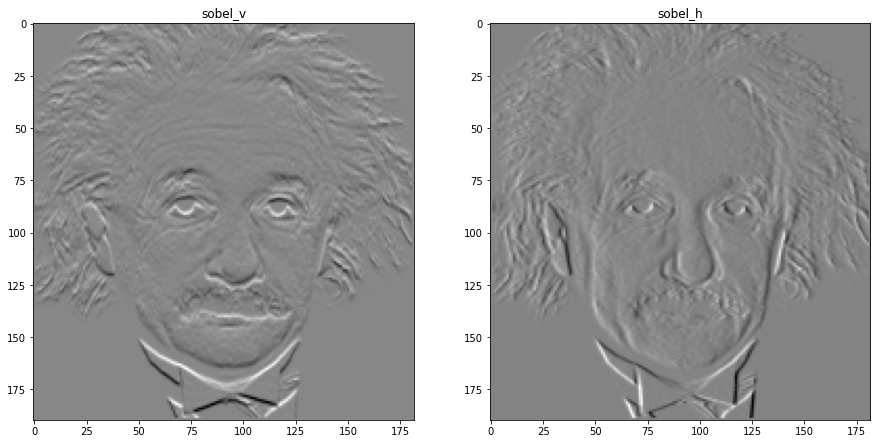

In [103]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread(r"einstein.png", cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.float32)
assert im is not None



def sobelv_modified(im):
    kernal1 = np.array([1, 0, -1])
    kernal2 = np.array([-1, -2, -1])

    sob1 = np.zeros(im.shape, dtype=np.float32)
    for row in range(1, im.shape[0]-1):
        for col in range(im.shape[1]):
            sob1[row][col] = np.dot(im[row-1:row+2, col].flatten(), kernal1.flatten())

    sob2 = np.zeros(im.shape, dtype=np.float32)
    for row in range(im.shape[0]):
        for col in range(1, im.shape[1]-1):
            sob2[row][col] = np.dot(im[row, col-1:col+2].flatten(), kernal2.flatten())

    return sob1, sob2

def sobelh_modified(im):
    kernal1 = np.array([1, 2, 1])
    kernal2 = np.array([-1, 0, 1])

    sob1 = np.zeros(im.shape, dtype=np.float32)
    for row in range(1, im.shape[0]-1):
        for col in range(im.shape[1]):
            sob1[row][col] = np.dot(im[row-1:row+2, col].flatten(), kernal1.flatten())

    sob2 = np.zeros(im.shape, dtype=np.float32)
    for row in range(im.shape[0]):
        for col in range(1, im.shape[1]-1):
            sob2[row][col] = np.dot(im[row, col-1:col+2].flatten(), kernal2.flatten())
    return sob1, sob2

sob1, sob2 = sobelv_modified(im)
sob3, sob4 = sobelh_modified(im)

fig, ax = plt.subplots(1,2, figsize=(15, 15))

ax[0].imshow(sob1*sob2, cmap='gray')
ax[0].set_title("sobel_v")

ax[1].imshow(sob3*sob4, cmap='gray')
ax[1].set_title("sobel_h")



# Q7

Text(0.5, 1.0, 'blur background + forground ')

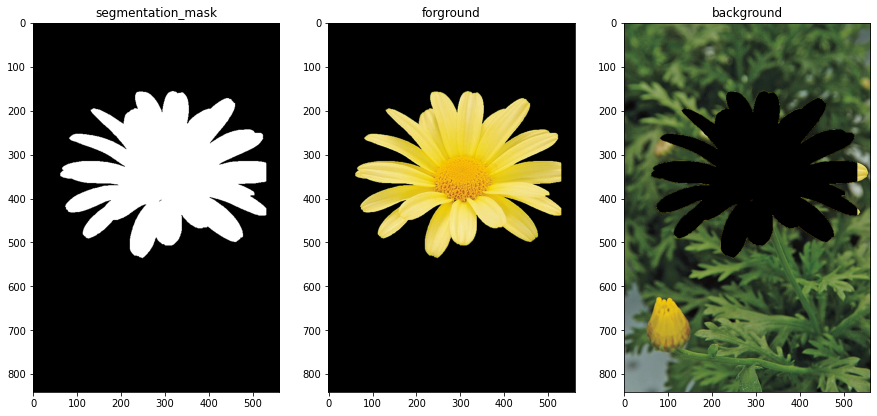

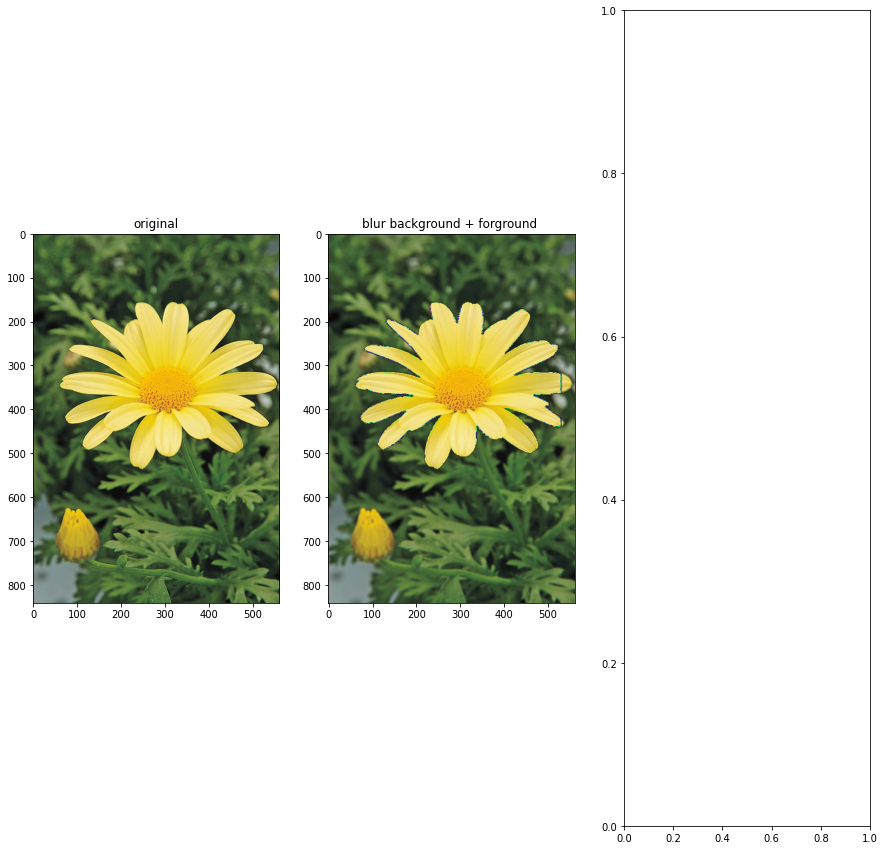

In [115]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread(r"daisy.jpg", cv.IMREAD_COLOR)

mask = np.zeros(im.shape[:2], np.uint8)
rect = (50, 50, 480, 500)

bgdmodel = np.zeros((1, 65), np.float64)
fgdmodel = np.zeros((1, 65), np.float64)

mask, bgModel, fgModel = cv.grabCut(im, mask, rect, bgdmodel, fgdmodel, 5, cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
img = im*mask2[:,:,np.newaxis]
img_forground = cv.cvtColor(img, cv.COLOR_BGR2RGB)

mask3 = np.where((mask==3) | (mask==1), 0, 1).astype('uint8')
img2 = im*mask3[:,:,np.newaxis]
img_background = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1,3, figsize=(15, 15))

ax[0].imshow(mask2, cmap='gray')
ax[0].set_title("segmentation_mask")

ax[1].imshow(img_forground)
ax[1].set_title("forground")
ax[2].imshow(img_background)
ax[2].set_title("background")

sigma = 7
blur_back = cv.GaussianBlur(img_background, (5,5), sigma)

fig, ax = plt.subplots(1,3, figsize=(15, 15))

ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB),  cmap='gray')
ax[0].set_title("original")
ax[1].imshow(blur_back +  img_forground)
ax[1].set_title("blur background + forground ")


# plt.imshow(im)
# plt.colorbar()
# plt.show()